In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("thyroid_dataset.csv")

In [5]:
df.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,61.0,6.0,23.0,87.0,26.0,o
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,29.0,15.0,61.0,96.0,64.0,o
2,0.16,0,1,0,0,0,0,0,0,0,...,0,1,0,0,29.0,19.0,58.0,103.0,56.0,o
3,0.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,114.0,3.0,24.0,61.0,39.0,o
4,0.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,49.0,3.0,5.0,116.0,4.0,o


In [6]:
X = df.drop("Outlier_label", axis=1)
y = df["Outlier_label"]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.ensemble import IsolationForest

# clf = IsolationForest(
#     n_estimators = 200,
#     contamination = "auto",
#     random_state = 42
# )

clf = IsolationForest(
    n_estimators = 200,
    contamination = 0.036,
    random_state = 42
)

In [9]:
labels = clf.fit_predict(X_scaled)

In [10]:
# Visualize
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

Text(0.5, 0, 'PCA2')

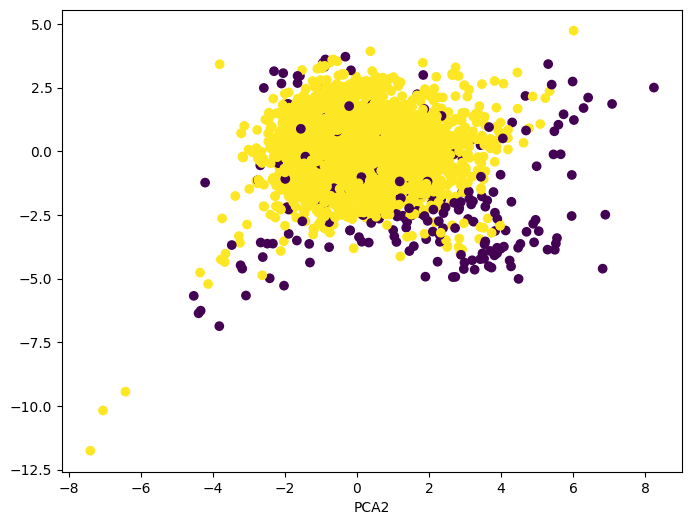

In [11]:
plt.figure(figsize=(8,6));
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel("PCA1")
plt.xlabel("PCA2")

In [12]:
import numpy as np
n_outliers = np.sum(labels == -1)
n_normal = np.sum(labels == 1)

print("outlier = ", n_outliers)
print("normal = ", n_normal)

outlier =  249
normal =  6667


# LOF

In [13]:
from sklearn.neighbors import LocalOutlierFactor

In [14]:
# neighbs = LocalOutlierFactor()
neighbs = LocalOutlierFactor(contamination=0.036)

labels = neighbs.fit_predict(X_scaled)

Text(0.5, 0, 'PCA2')

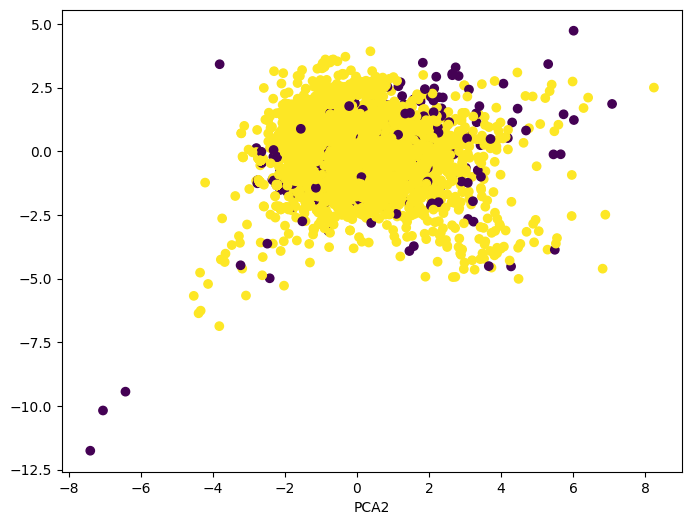

In [15]:
plt.figure(figsize=(8,6));
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel("PCA1")
plt.xlabel("PCA2")

In [16]:
n_outliers = np.sum(labels == -1)
n_normal = np.sum(labels == 1)

print("outlier = ", n_outliers)
print("normal = ", n_normal)

outlier =  249
normal =  6667
